In [214]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [215]:
import pandas as pd
from numpy import NaN
import matplotlib.pyplot as plt

In [216]:
%autoreload 2

from src.misc import load_intermediate_data, plot_statistics

In [217]:
DATE_FORMAT = '%Y-%m-%dT%H:%H%M%z'  # ISO 8601 datetime format

# Get other definitions
%run "00-definitions.ipynb"

Create a summary table

In [218]:
summary = pd.DataFrame(index=AREAS.values()).sort_index()

## Results for onshore wind power

### Actual generation

Let’s plot some statistics about the CF time series and the change time series. Box plots show 1st, 2nd and 3rd quartile as well as the mean (triangles) of the data. Note that also for countries with only hourly data, changes are calculated from interpolated 15-minute time series to make them comparable.

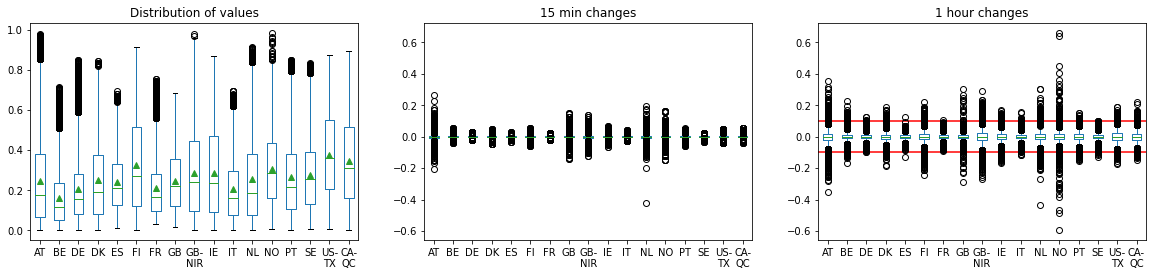

In [219]:
cf_wind_onshore = load_intermediate_data('CF Wind Onshore')
plot_statistics(cf_wind_onshore, MIN_TIMESTEP);

Check coverages

In [265]:
statistics = pd.read_csv(
    '../data/intermediate/Statistics generation Wind Onshore.csv', 
    index_col=0
)
statistics

,expanded length,original coverage,missing values,interpolated coverage,RMSE of filter
AT,35040.0,1.000000,0.0,NaN,8.540024
BE,8760.0,1.000000,0.0,NaN,9.893830
DE,8760.0,0.999886,0.0,1.000000,26.517985
DK,8760.0,1.000000,0.0,NaN,42.283920
ES,8760.0,0.999886,0.0,1.000000,20.770690
FI,8760.0,0.999772,2.0,0.999772,3.818043
FR,8760.0,0.999543,0.0,1.000000,15.126548
GB,17520.0,0.999715,0.0,1.000000,40.479120
GB-NIR,17520.0,0.999658,2.0,0.999886,7.361197
IE,17520.0,0.999429,0.0,1.000000,10.634017


Write final files.

In [266]:
cf_wind_onshore.to_csv('../data/processed/CF Wind Onshore.csv', header=True)

Update summary table

In [267]:
label = ('Actual', 'Wind Onshore')
summary[label] = ''
summary.loc[cf_wind_onshore.columns, label] = 'OK'

In [268]:
summary.loc[statistics[statistics['missing values'] > 0].index, ('Actual', 'Wind Onshore')] = 'gaps'
summary.to_clipboard()
summary

Actual                                    Forecast          \
          Load   Solar Wind Offshore Wind Onshore     Load   Solar   
AT          OK      OK           n/a           OK       OK      OK   
BE          OK      OK           n/a           OK       OK      OK   
CA-QC      n/a     n/a           n/a           OK      n/a     n/a   
DE        gaps      OK            OK           OK     gaps    gaps   
DK          OK      OK            OK           OK       OK      OK   
ES          OK      OK           n/a           OK       OK      OK   
FI          OK     n/a           n/a         gaps       OK     n/a   
FR        gaps      OK           n/a           OK       OK    gaps   
GB      errors      OK            OK           OK       OK      OK   
GB-NIR      OK     n/a           n/a         gaps     gaps     n/a   
IE          OK     n/a           n/a           OK     gaps     n/a   
IT          OK  errors           n/a         gaps       OK      OK   
JP         n/a     n/a           n/a                   n/a     n/a   
NL          OK    gaps            OK           OK       OK    gaps   
NO          OK     n/a           n/a           OK       OK     n/a   
PT          OK  errors           n/a         gaps       OK  errors   
SE          OK    gaps           n/a         gaps       OK     n/a   
US-TX      n/a     n/a           n/a         gaps      n/a     n/a   

                                   
       Wind Offshore Wind Onshore  
AT               n/a           OK  
BE            errors           OK  
CA-QC            n/a           OK  
DE                OK         gaps  
DK                OK           OK  
ES               n/a           OK  
FI               n/a         gaps  
FR               n/a         gaps  
GB                OK           OK  
GB-NIR           n/a         gaps  
IE               n/a         gaps  
IT               n/a               
JP               n/a               
NL                OK       errors  
NO               n/a         gaps  
PT               n/a         gaps  
SE               n/a       errors  
US-TX            n/a

### Generation forecast

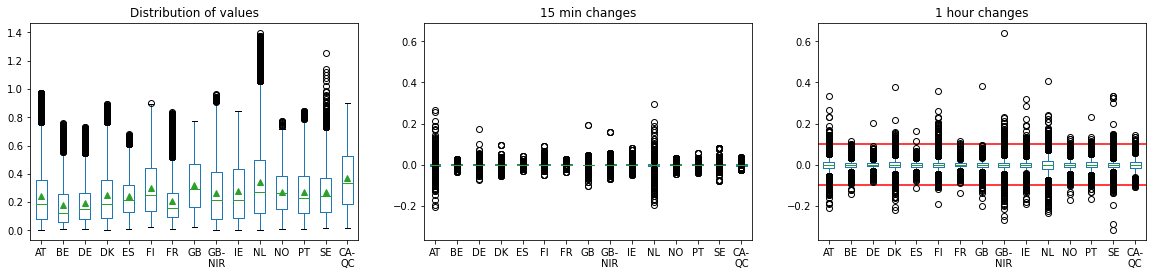

In [269]:
cf_wind_onshore_fcast = load_intermediate_data('CF Wind Onshore forecast')
plot_statistics(cf_wind_onshore_fcast, MIN_TIMESTEP);

In [270]:
statistics = pd.read_csv(
    '../data/intermediate/Statistics forecast Wind Onshore.csv', 
    index_col=0
)
statistics

,expanded length,original coverage,missing values,interpolated coverage,RMSE of filter
AT,35040.0,1.000000,0.0,NaN,3.226230
BE,8760.0,1.000000,0.0,NaN,2.367922
DE,35040.0,0.986301,460.0,0.986872,11.435331
DK,8760.0,1.000000,0.0,NaN,11.048184
ES,8760.0,1.000000,0.0,NaN,13.414285
FI,8760.0,0.997260,18.0,0.997945,6.960693
FR,8760.0,0.996689,21.0,0.997603,31.665006
GB,17520.0,1.000000,0.0,NaN,9.032106
GB-NIR,8760.0,0.996804,20.0,0.997717,3.691630
IE,8760.0,0.997260,20.0,0.997717,9.189381


Write final files.

In [271]:
cf_wind_onshore_fcast.to_csv('../data/processed/CF Wind Onshore forecast.csv', header=True)

Update the summary table

In [272]:
label = ('Forecast', 'Wind Onshore')
summary[label] = ''
summary.loc[cf_wind_onshore_fcast.columns, label] = 'OK'
summary.loc[statistics[statistics['missing values'] > 0].index, label] = 'gaps'
summary.loc[['NL', 'SE'], label] = 'errors'
summary

Actual                                    Forecast          \
          Load   Solar Wind Offshore Wind Onshore     Load   Solar   
AT          OK      OK           n/a           OK       OK      OK   
BE          OK      OK           n/a           OK       OK      OK   
CA-QC      n/a     n/a           n/a           OK      n/a     n/a   
DE        gaps      OK            OK           OK     gaps    gaps   
DK          OK      OK            OK           OK       OK      OK   
ES          OK      OK           n/a           OK       OK      OK   
FI          OK     n/a           n/a         gaps       OK     n/a   
FR        gaps      OK           n/a           OK       OK    gaps   
GB      errors      OK            OK           OK       OK      OK   
GB-NIR      OK     n/a           n/a         gaps     gaps     n/a   
IE          OK     n/a           n/a           OK     gaps     n/a   
IT          OK  errors           n/a         gaps       OK      OK   
JP         n/a     n/a           n/a                   n/a     n/a   
NL          OK    gaps            OK           OK       OK    gaps   
NO          OK     n/a           n/a           OK       OK     n/a   
PT          OK  errors           n/a         gaps       OK  errors   
SE          OK    gaps           n/a         gaps       OK     n/a   
US-TX      n/a     n/a           n/a         gaps      n/a     n/a   

                                   
       Wind Offshore Wind Onshore  
AT               n/a           OK  
BE            errors           OK  
CA-QC            n/a           OK  
DE                OK         gaps  
DK                OK           OK  
ES               n/a           OK  
FI               n/a         gaps  
FR               n/a         gaps  
GB                OK           OK  
GB-NIR           n/a         gaps  
IE               n/a         gaps  
IT               n/a               
JP               n/a               
NL                OK       errors  
NO               n/a         gaps  
PT               n/a         gaps  
SE               n/a       errors  
US-TX            n/a

## Results for offshore wind power

### Actual generation

Let’s plot the same statistics for offshore wind.

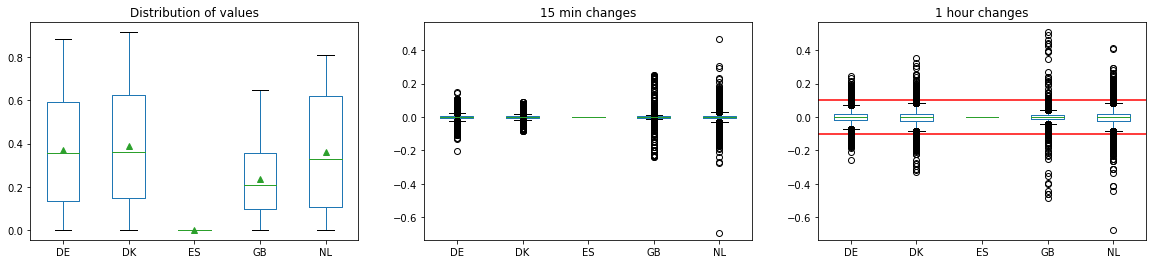

In [273]:
cf_wind_offshore = load_intermediate_data('CF Wind Offshore')
plot_statistics(cf_wind_offshore, MIN_TIMESTEP);

Clearly something wrong with Spain. Let’s plot the time series.

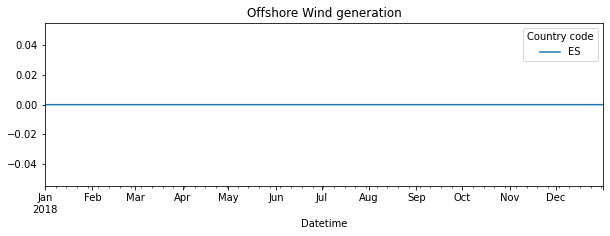

In [274]:
cf_wind_offshore[['ES']].dropna().plot(figsize=(10, 3), title='Offshore Wind generation');

Clearly, Spain acctually has no data. 

Check statistics

In [275]:
statistics = pd.read_csv(f'../data/intermediate/Statistics generation Wind Offshore.csv', index_col=0)
statistics

,expanded length,original coverage,missing values,interpolated coverage,RMSE of filter
DE,35040.0,1.000000,0.0,NaN,13.613799
DK,8760.0,1.000000,0.0,NaN,11.313397
ES,8760.0,0.999886,0.0,1.0,0.000000
GB,17520.0,0.999715,0.0,1.0,24.108582
NL,35040.0,0.999658,0.0,1.0,5.661793
AT,NaN,NaN,NaN,NaN,NaN
BE,NaN,NaN,NaN,NaN,NaN
FI,NaN,NaN,NaN,NaN,NaN
FR,NaN,NaN,NaN,NaN,NaN
GB-NIR,NaN,NaN,NaN,NaN,NaN


Write final files, excluding Spain.

In [276]:
cf_wind_offshore.drop(['ES'], axis=1, inplace=True, errors='ignore')
cf_wind_offshore.to_csv('../data/processed/CF Wind Offshore.csv', header=True)

Update the summary table.

In [277]:
label = ('Actual', 'Wind Offshore')
summary[label] = 'n/a'
summary.loc[cf_wind_offshore.columns, label] = 'OK'
summary.loc['ES', label] = 'n/a'
summary

Actual                                    Forecast          \
          Load   Solar Wind Offshore Wind Onshore     Load   Solar   
AT          OK      OK           n/a           OK       OK      OK   
BE          OK      OK           n/a           OK       OK      OK   
CA-QC      n/a     n/a           n/a           OK      n/a     n/a   
DE        gaps      OK            OK           OK     gaps    gaps   
DK          OK      OK            OK           OK       OK      OK   
ES          OK      OK           n/a           OK       OK      OK   
FI          OK     n/a           n/a         gaps       OK     n/a   
FR        gaps      OK           n/a           OK       OK    gaps   
GB      errors      OK            OK           OK       OK      OK   
GB-NIR      OK     n/a           n/a         gaps     gaps     n/a   
IE          OK     n/a           n/a           OK     gaps     n/a   
IT          OK  errors           n/a         gaps       OK      OK   
JP         n/a     n/a           n/a                   n/a     n/a   
NL          OK    gaps            OK           OK       OK    gaps   
NO          OK     n/a           n/a           OK       OK     n/a   
PT          OK  errors           n/a         gaps       OK  errors   
SE          OK    gaps           n/a         gaps       OK     n/a   
US-TX      n/a     n/a           n/a         gaps      n/a     n/a   

                                   
       Wind Offshore Wind Onshore  
AT               n/a           OK  
BE            errors           OK  
CA-QC            n/a           OK  
DE                OK         gaps  
DK                OK           OK  
ES               n/a           OK  
FI               n/a         gaps  
FR               n/a         gaps  
GB                OK           OK  
GB-NIR           n/a         gaps  
IE               n/a         gaps  
IT               n/a               
JP               n/a               
NL                OK       errors  
NO               n/a         gaps  
PT               n/a         gaps  
SE               n/a       errors  
US-TX            n/a

### Generation forecast

Let’s plot the same statistics for offshore wind.

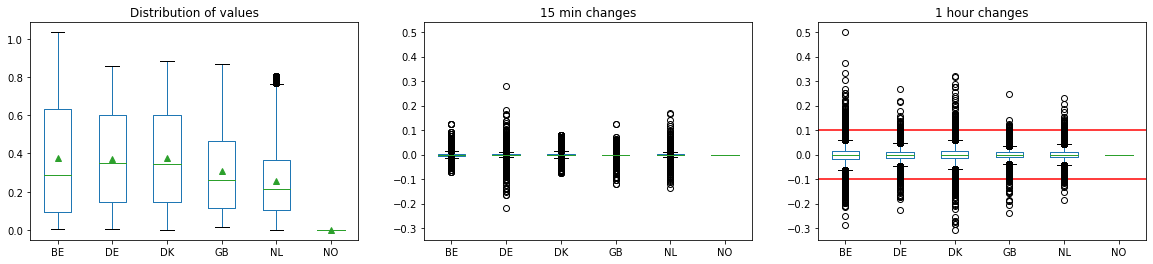

In [278]:
cf_wind_offshore_fcast = load_intermediate_data('CF Wind Offshore forecast')
plot_statistics(cf_wind_offshore_fcast, MIN_TIMESTEP);

Clearly something wrong with Norway. Let’s plot the time series.

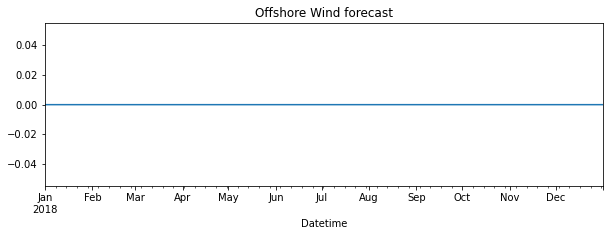

In [279]:
cf_wind_offshore_fcast['NO'].dropna().plot(figsize=(10, 3), title='Offshore Wind forecast');

Clearly, Norway acctually has no data. 

Check statistics

In [280]:
statistics = pd.read_csv(f'../data/intermediate/Statistics forecast Wind Offshore.csv', index_col=0)
statistics

,expanded length,original coverage,missing values,interpolated coverage,RMSE of filter
BE,8760.0,1.000000,0.0,NaN,2.840931
DE,35040.0,1.000000,0.0,NaN,4.883853
DK,8760.0,1.000000,0.0,NaN,6.790066
GB,17520.0,1.000000,0.0,NaN,9.943287
NL,35040.0,0.997260,92.0,0.997374,0.745784
NO,8760.0,0.999886,0.0,1.000000,0.000000
AT,NaN,NaN,NaN,NaN,NaN
ES,NaN,NaN,NaN,NaN,NaN
FI,NaN,NaN,NaN,NaN,NaN
FR,NaN,NaN,NaN,NaN,NaN


Write final files, excluding Norway.

In [281]:
cf_wind_offshore_fcast.drop(['NO'], axis=1, inplace=True, errors='ignore')
cf_wind_offshore_fcast.to_csv('../data/processed/CF Wind Offshore.csv', header=True)

Update the summary table.

In [282]:
label = ('Forecast', 'Wind Offshore')
summary[label] = 'n/a'
summary.loc[cf_wind_offshore.columns, label] = 'OK'
summary.loc['BE', label] = 'errors'
summary

Actual                                    Forecast          \
          Load   Solar Wind Offshore Wind Onshore     Load   Solar   
AT          OK      OK           n/a           OK       OK      OK   
BE          OK      OK           n/a           OK       OK      OK   
CA-QC      n/a     n/a           n/a           OK      n/a     n/a   
DE        gaps      OK            OK           OK     gaps    gaps   
DK          OK      OK            OK           OK       OK      OK   
ES          OK      OK           n/a           OK       OK      OK   
FI          OK     n/a           n/a         gaps       OK     n/a   
FR        gaps      OK           n/a           OK       OK    gaps   
GB      errors      OK            OK           OK       OK      OK   
GB-NIR      OK     n/a           n/a         gaps     gaps     n/a   
IE          OK     n/a           n/a           OK     gaps     n/a   
IT          OK  errors           n/a         gaps       OK      OK   
JP         n/a     n/a           n/a                   n/a     n/a   
NL          OK    gaps            OK           OK       OK    gaps   
NO          OK     n/a           n/a           OK       OK     n/a   
PT          OK  errors           n/a         gaps       OK  errors   
SE          OK    gaps           n/a         gaps       OK     n/a   
US-TX      n/a     n/a           n/a         gaps      n/a     n/a   

                                   
       Wind Offshore Wind Onshore  
AT               n/a           OK  
BE            errors           OK  
CA-QC            n/a           OK  
DE                OK         gaps  
DK                OK           OK  
ES               n/a           OK  
FI               n/a         gaps  
FR               n/a         gaps  
GB                OK           OK  
GB-NIR           n/a         gaps  
IE               n/a         gaps  
IT               n/a               
JP               n/a               
NL                OK       errors  
NO               n/a         gaps  
PT               n/a         gaps  
SE               n/a       errors  
US-TX            n/a

## Solar power

### Actual generation

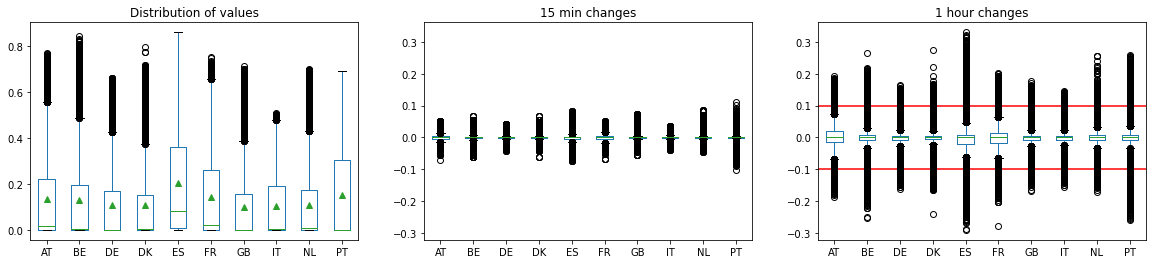

In [283]:
cf_solar = load_intermediate_data('CF Solar')
plot_statistics(cf_solar, MIN_TIMESTEP);

Check statistics

In [284]:
statistics = pd.read_csv(f'../data/intermediate/Statistics generation Solar.csv', index_col=0)
statistics

,expanded length,original coverage,missing values,interpolated coverage,RMSE of filter
AT,35040.0,1.000000,0.0,NaN,0.370463
BE,8760.0,1.000000,0.0,NaN,8.760097
DE,35040.0,1.000000,0.0,NaN,0.000000
DK,8760.0,1.000000,0.0,NaN,1.419320
ES,8760.0,0.999886,0.0,1.000000,0.000000
FR,8760.0,0.999658,0.0,1.000000,11.547107
GB,17520.0,0.999715,0.0,1.000000,56.958725
IT,8760.0,0.998973,5.0,0.999429,17.960170
NL,35040.0,0.991781,280.0,0.992009,1.263139
PT,35040.0,0.998288,56.0,0.998402,1.208407


In [311]:
cf_solar.to_csv('../data/processed/CF Solar.csv', header=True)

Update the summary.

In [312]:
label = ('Actual', 'Solar')
summary[label] = 'n/a'
summary.loc[cf_solar.columns, label] = 'OK'
summary.loc[statistics[statistics['missing values'] > 0].index, label] = 'gaps'
summary

Actual                                  Forecast          \
          Load Solar Wind Offshore Wind Onshore     Load   Solar   
AT          OK    OK           n/a           OK       OK      OK   
BE          OK    OK           n/a           OK       OK      OK   
CA-QC      n/a   n/a           n/a           OK      n/a     n/a   
DE        gaps  gaps            OK           OK     gaps    gaps   
DK          OK    OK            OK           OK       OK      OK   
ES          OK    OK           n/a           OK       OK      OK   
FI          OK   n/a           n/a         gaps       OK     n/a   
FR        gaps    OK           n/a           OK       OK    gaps   
GB      errors    OK            OK           OK       OK      OK   
GB-NIR      OK  gaps           n/a         gaps     gaps     n/a   
IE          OK  gaps           n/a           OK     gaps     n/a   
IT          OK    OK           n/a         gaps       OK      OK   
JP         n/a   n/a           n/a                   n/a     n/a   
NL          OK    OK            OK           OK       OK    gaps   
NO          OK   n/a           n/a           OK       OK     n/a   
PT          OK    OK           n/a         gaps       OK  errors   
SE          OK   n/a           n/a         gaps       OK     n/a   
US-TX      n/a   n/a           n/a         gaps      n/a     n/a   

                                   
       Wind Offshore Wind Onshore  
AT               n/a           OK  
BE            errors           OK  
CA-QC            n/a           OK  
DE                OK         gaps  
DK                OK           OK  
ES               n/a           OK  
FI               n/a         gaps  
FR               n/a         gaps  
GB                OK           OK  
GB-NIR           n/a         gaps  
IE               n/a         gaps  
IT               n/a               
JP               n/a               
NL                OK       errors  
NO               n/a         gaps  
PT               n/a         gaps  
SE               n/a       errors  
US-TX            n/a

### Generation forecasts

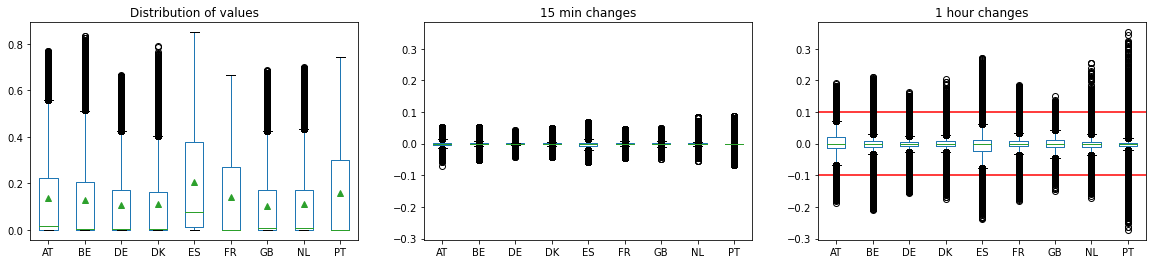

In [313]:
cf_solar_fcasts = load_intermediate_data('CF Solar forecast')
plot_statistics(cf_solar_fcasts, MIN_TIMESTEP);

Write final data

In [314]:
cf_solar_fcasts.to_csv('../data/processed/CF Solar forecast.csv', header=True)

Check statistics

In [315]:
statistics = pd.read_csv(f'../data/intermediate/Statistics forecast Solar.csv', index_col=0)
statistics

,expanded length,original coverage,missing values,interpolated coverage,RMSE of filter
AT,35040.0,1.000000,0.0,NaN,0.402085
BE,8760.0,1.000000,0.0,NaN,0.000000
DE,35040.0,0.986301,460.0,0.986872,0.000000
DK,8760.0,1.000000,0.0,NaN,0.000000
ES,8760.0,1.000000,0.0,NaN,0.000000
FR,8760.0,0.994521,40.0,0.995434,0.000000
GB,17520.0,1.000000,0.0,NaN,0.000000
NL,35040.0,0.997260,92.0,0.997374,3.645480
NO,8760.0,0.999886,0.0,1.000000,0.000000
PT,8760.0,0.800000,1708.0,0.805023,3.918564


Update the summary.

In [336]:
label = ('Forecast', 'Solar')
summary[label] = 'n/a'
summary.loc[cf_solar.columns, label] = 'OK'
summary.loc[statistics[statistics['missing values'] > 0].index, label] = 'gaps'
summary

Actual                                  Forecast                      \
          Load Solar Wind Offshore Wind Onshore     Load Solar Wind Offshore   
AT          OK    OK           n/a           OK       OK    OK           n/a   
BE          OK    OK           n/a           OK       OK    OK        errors   
CA-QC      n/a   n/a           n/a           OK      n/a   n/a           n/a   
DE        gaps  gaps            OK           OK     gaps  gaps            OK   
DK          OK    OK            OK           OK       OK    OK            OK   
ES          OK    OK           n/a           OK       OK    OK           n/a   
FI          OK   n/a           n/a         gaps       OK   n/a           n/a   
FR        gaps    OK           n/a           OK       OK    OK           n/a   
GB      errors    OK            OK           OK       OK    OK            OK   
GB-NIR      OK  gaps           n/a         gaps     gaps  gaps           n/a   
IE          OK  gaps           n/a           OK     gaps  gaps           n/a   
IT          OK    OK           n/a         gaps       OK    OK           n/a   
JP         n/a   n/a           n/a                   n/a   n/a           n/a   
NL          OK    OK            OK           OK       OK    OK            OK   
NO          OK   n/a           n/a           OK       OK   n/a           n/a   
PT          OK    OK           n/a         gaps       OK    OK           n/a   
SE          OK   n/a           n/a         gaps       OK   n/a           n/a   
US-TX      n/a   n/a           n/a         gaps      n/a   n/a           n/a   

                     
       Wind Onshore  
AT               OK  
BE               OK  
CA-QC            OK  
DE             gaps  
DK               OK  
ES               OK  
FI             gaps  
FR             gaps  
GB               OK  
GB-NIR         gaps  
IE             gaps  
IT                   
JP                   
NL           errors  
NO             gaps  
PT             gaps  
SE           errors  
US-TX

## Load data

### Actual

In [317]:
load_data = pd.read_csv('../data/intermediate/Load.csv', index_col=0, parse_dates=True)

In [318]:
relative_load = load_data.div(load_data.max()).dropna(1, 'all')

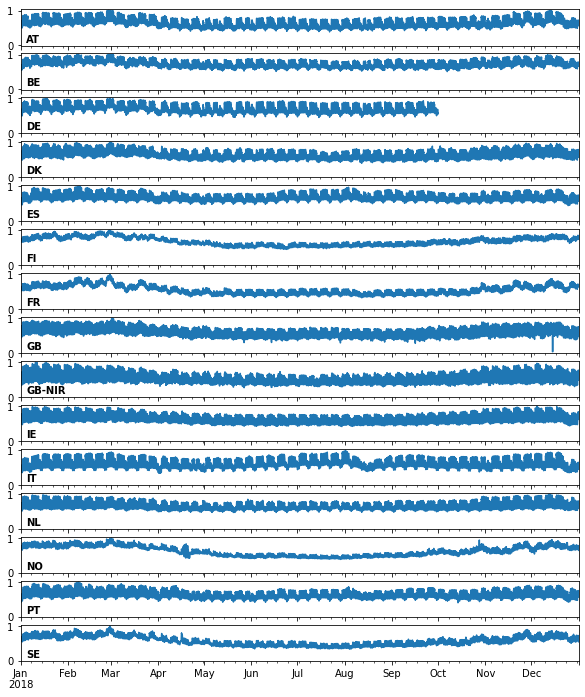

In [319]:
fig, axs = plt.subplots(nrows=len(relative_load.columns), 
                        sharey=True, sharex=True,
                        figsize=(10, 12))
for ax, cc in zip(axs, relative_load.columns):
    relative_load[cc].dropna().plot(ax=ax)
    ax.text(0.01, 0.1, cc, transform=ax.transAxes, weight='bold')

Germany has data after Sept/Oct missing. GB has strange dopr in December.

Let’s check the statistics.

c:\users\ererkka\onedrive - teknologian tutkimuskeskus vtt\projects\iea wind 25\timeseries\src\misc.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['\n'.join(wrap(l.get_text(), length)) for l in iter(ax.get_xticklabels())])


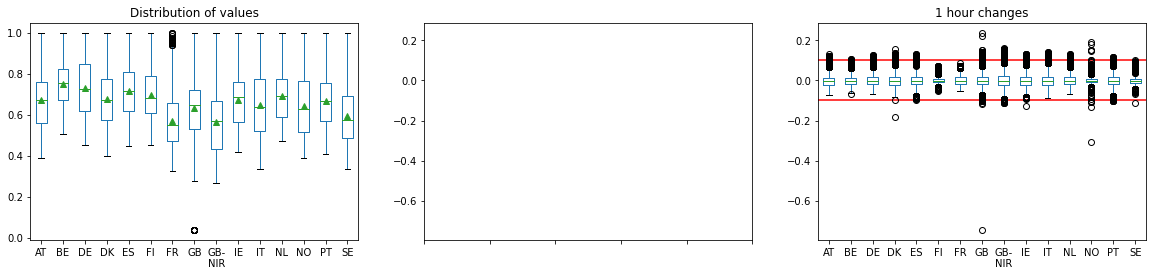

In [320]:
plot_statistics(relative_load);

GB still has a large drop, let’s remove that.

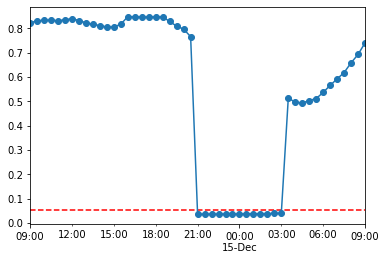

In [321]:
relative_load_GB = relative_load['GB'].dropna().copy()
t = relative_load_GB.idxmin()
min_value = relative_load_GB.min()
delta_t = pd.Timedelta('12 h')
t_range = slice(t - delta_t, t+ delta_t)
ax = relative_load_GB[t_range].dropna().plot(style='o-')
yrange = ax.get_ylim()
threshold = 1.5 * min_value
ax.hlines(threshold, t_range.start, t_range.stop, colors='r', linestyles='--');

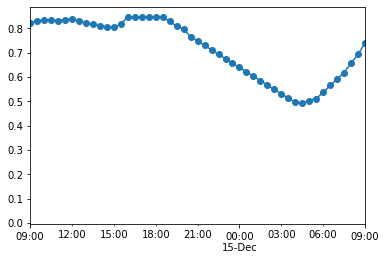

In [322]:
relative_load_GB[relative_load_GB < 1.5 * min_value] = NaN
relative_load_GB = relative_load_GB.interpolate('time')
ax = relative_load_GB[t_range].plot(style='o-')
ax.set_ylim(yrange);

c:\users\ererkka\onedrive - teknologian tutkimuskeskus vtt\projects\iea wind 25\timeseries\src\misc.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['\n'.join(wrap(l.get_text(), length)) for l in iter(ax.get_xticklabels())])


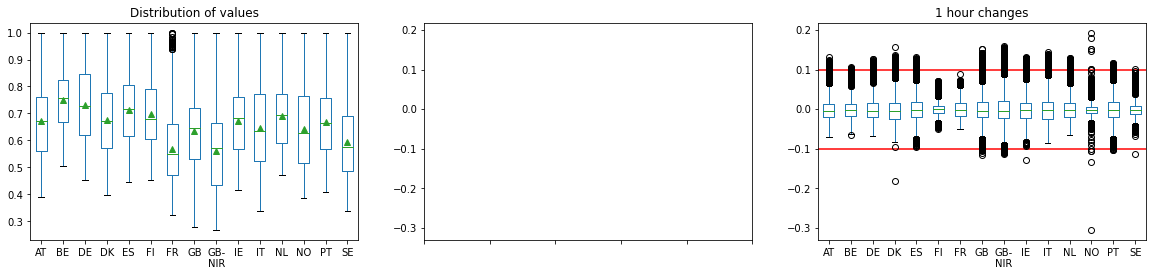

In [323]:
relative_load['GB'] = relative_load_GB
plot_statistics(relative_load);

Check statistics

In [324]:
statistics = pd.read_csv(f'../data/intermediate/Statistics Load.csv', index_col=0)
statistics

,expanded length,original coverage,missing values,interpolated coverage,RMSE of filter
AT,35040.0,1.000000,0.0,NaN,2.653994
BE,35040.0,1.000000,0.0,NaN,13.182818
DE,35040.0,0.747317,8844.0,0.747603,13.759180
DK,8760.0,1.000000,0.0,NaN,46.214368
ES,8760.0,0.999772,0.0,1.000000,105.292958
FI,8760.0,0.999658,0.0,1.000000,9.760239
FR,8760.0,0.997945,1.0,0.999886,235.603361
GB,17520.0,0.999772,0.0,1.000000,266.361390
GB-NIR,17520.0,0.999772,0.0,1.000000,0.675579
IE,17520.0,0.998744,0.0,1.000000,1.939452


Update the summary

In [325]:
label = ('Actual', 'Load')
summary[label] = 'n/a'
summary.loc[relative_load.columns, label] = 'OK'
summary.loc[statistics[statistics['missing values'] > 0].index, label] = 'gaps'
summary.loc['GB', label] = 'errors'
summary.sort_index()

Actual                                  Forecast          \
          Load Solar Wind Offshore Wind Onshore     Load   Solar   
AT          OK    OK           n/a           OK       OK      OK   
BE          OK    OK           n/a           OK       OK      OK   
CA-QC      n/a   n/a           n/a           OK      n/a     n/a   
DE        gaps  gaps            OK           OK     gaps    gaps   
DK          OK    OK            OK           OK       OK      OK   
ES          OK    OK           n/a           OK       OK      OK   
FI          OK   n/a           n/a         gaps       OK     n/a   
FR        gaps    OK           n/a           OK       OK    gaps   
GB      errors    OK            OK           OK       OK      OK   
GB-NIR      OK  gaps           n/a         gaps     gaps     n/a   
IE          OK  gaps           n/a           OK     gaps     n/a   
IT          OK    OK           n/a         gaps       OK      OK   
JP         n/a   n/a           n/a                   n/a     n/a   
NL          OK    OK            OK           OK       OK    gaps   
NO          OK   n/a           n/a           OK       OK     n/a   
PT          OK    OK           n/a         gaps       OK  errors   
SE          OK   n/a           n/a         gaps       OK     n/a   
US-TX      n/a   n/a           n/a         gaps      n/a     n/a   

                                   
       Wind Offshore Wind Onshore  
AT               n/a           OK  
BE            errors           OK  
CA-QC            n/a           OK  
DE                OK         gaps  
DK                OK           OK  
ES               n/a           OK  
FI               n/a         gaps  
FR               n/a         gaps  
GB                OK           OK  
GB-NIR           n/a         gaps  
IE               n/a         gaps  
IT               n/a               
JP               n/a               
NL                OK       errors  
NO               n/a         gaps  
PT               n/a         gaps  
SE               n/a       errors  
US-TX            n/a

Write final data

In [326]:
relative_load.drop('DE', axis=1, errors='ignore', inplace=True)
relative_load.to_csv('../data/processed/Load.csv', header=True)

### Load forecast

In [327]:
load_fcast = pd.read_csv('../data/intermediate/Load_forecast.csv', index_col=0, parse_dates=True)

In [328]:
relative_load_fcast = load_data.div(load_data.max()).dropna(1, 'all')

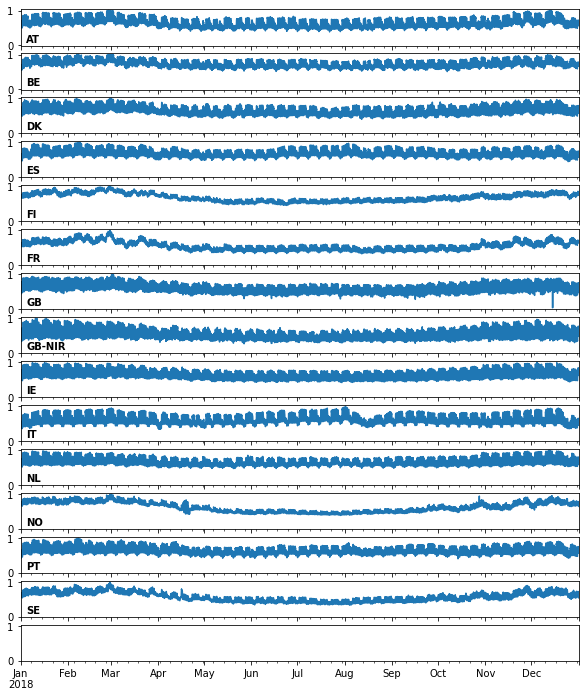

In [329]:
fig, axs = plt.subplots(nrows=len(relative_load_fcast.columns), 
                        sharey=True, sharex=True,
                        figsize=(10, 12))
for ax, cc in zip(axs, relative_load.columns):
    relative_load_fcast[cc].dropna().plot(ax=ax)
    ax.text(0.01, 0.1, cc, transform=ax.transAxes, weight='bold')

Germany missing rest of the year again.

Let’s check the statistics.

c:\users\ererkka\onedrive - teknologian tutkimuskeskus vtt\projects\iea wind 25\timeseries\src\misc.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['\n'.join(wrap(l.get_text(), length)) for l in iter(ax.get_xticklabels())])


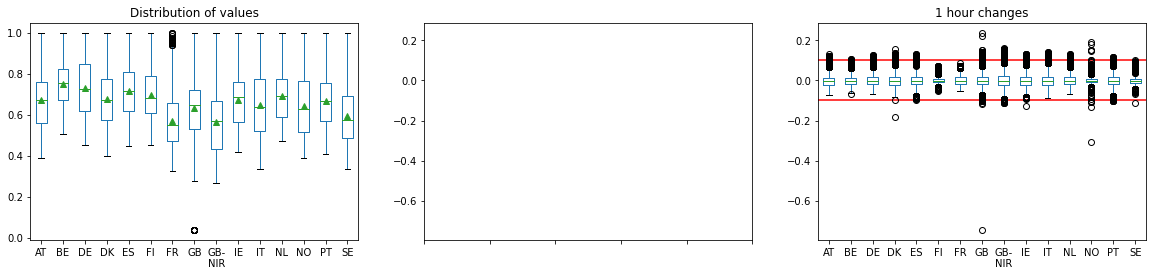

In [330]:
plot_statistics(relative_load_fcast);

Check statistics

In [331]:
statistics = pd.read_csv(f'../data/intermediate/Statistics load_forecast.csv', index_col=0)
statistics

,expanded length,original coverage,missing values,interpolated coverage,RMSE of filter
AT,35040.0,1.000000,0.0,NaN,10.084837
BE,35040.0,1.000000,0.0,NaN,9.082005
DE,35040.0,0.723088,9679.0,0.723773,21.944524
DK,8760.0,1.000000,0.0,NaN,19.123390
ES,8760.0,1.000000,0.0,NaN,106.425150
FI,8760.0,1.000000,0.0,NaN,7.449447
FR,8760.0,1.000000,0.0,NaN,562.629691
GB,17520.0,1.000000,0.0,NaN,0.000000
GB-NIR,17520.0,0.972603,448.0,0.974429,2.089438
IE,17520.0,0.989041,176.0,0.989954,4.812015


Update the summary

In [332]:
label = ('Forecast', 'Load')
summary[label] = 'n/a'
summary.loc[relative_load.columns, label] = 'OK'
summary.loc[statistics[statistics['missing values'] > 0].index, label] = 'gaps'
summary.sort_index()

Actual                                  Forecast          \
          Load Solar Wind Offshore Wind Onshore     Load   Solar   
AT          OK    OK           n/a           OK       OK      OK   
BE          OK    OK           n/a           OK       OK      OK   
CA-QC      n/a   n/a           n/a           OK      n/a     n/a   
DE        gaps  gaps            OK           OK     gaps    gaps   
DK          OK    OK            OK           OK       OK      OK   
ES          OK    OK           n/a           OK       OK      OK   
FI          OK   n/a           n/a         gaps       OK     n/a   
FR        gaps    OK           n/a           OK       OK    gaps   
GB      errors    OK            OK           OK       OK      OK   
GB-NIR      OK  gaps           n/a         gaps     gaps     n/a   
IE          OK  gaps           n/a           OK     gaps     n/a   
IT          OK    OK           n/a         gaps       OK      OK   
JP         n/a   n/a           n/a                   n/a     n/a   
NL          OK    OK            OK           OK       OK    gaps   
NO          OK   n/a           n/a           OK       OK     n/a   
PT          OK    OK           n/a         gaps       OK  errors   
SE          OK   n/a           n/a         gaps       OK     n/a   
US-TX      n/a   n/a           n/a         gaps      n/a     n/a   

                                   
       Wind Offshore Wind Onshore  
AT               n/a           OK  
BE            errors           OK  
CA-QC            n/a           OK  
DE                OK         gaps  
DK                OK           OK  
ES               n/a           OK  
FI               n/a         gaps  
FR               n/a         gaps  
GB                OK           OK  
GB-NIR           n/a         gaps  
IE               n/a         gaps  
IT               n/a               
JP               n/a               
NL                OK       errors  
NO               n/a         gaps  
PT               n/a         gaps  
SE               n/a       errors  
US-TX            n/a

Write final data

In [333]:
relative_load_fcast.drop('DE', axis=1, errors='ignore', inplace=True)
relative_load_fcast.to_csv('../data/processed/Load forecast.csv', header=True)

In [334]:
summary.columns = pd.MultiIndex.from_tuples(summary.columns)
summary = summary.sort_index(1)
summary

Actual                                  Forecast          \
          Load Solar Wind Offshore Wind Onshore     Load   Solar   
AT          OK    OK           n/a           OK       OK      OK   
BE          OK    OK           n/a           OK       OK      OK   
CA-QC      n/a   n/a           n/a           OK      n/a     n/a   
DE        gaps  gaps            OK           OK     gaps    gaps   
DK          OK    OK            OK           OK       OK      OK   
ES          OK    OK           n/a           OK       OK      OK   
FI          OK   n/a           n/a         gaps       OK     n/a   
FR        gaps    OK           n/a           OK       OK    gaps   
GB      errors    OK            OK           OK       OK      OK   
GB-NIR      OK  gaps           n/a         gaps     gaps     n/a   
IE          OK  gaps           n/a           OK     gaps     n/a   
IT          OK    OK           n/a         gaps       OK      OK   
JP         n/a   n/a           n/a                   n/a     n/a   
NL          OK    OK            OK           OK       OK    gaps   
NO          OK   n/a           n/a           OK       OK     n/a   
PT          OK    OK           n/a         gaps       OK  errors   
SE          OK   n/a           n/a         gaps       OK     n/a   
US-TX      n/a   n/a           n/a         gaps      n/a     n/a   

                                   
       Wind Offshore Wind Onshore  
AT               n/a           OK  
BE            errors           OK  
CA-QC            n/a           OK  
DE                OK         gaps  
DK                OK           OK  
ES               n/a           OK  
FI               n/a         gaps  
FR               n/a         gaps  
GB                OK           OK  
GB-NIR           n/a         gaps  
IE               n/a         gaps  
IT               n/a               
JP               n/a               
NL                OK       errors  
NO               n/a         gaps  
PT               n/a         gaps  
SE               n/a       errors  
US-TX            n/a

In [337]:
summary.to_clipboard()